In [1]:
%load_ext autoreload
%autoreload 2

# Satellite quickview playground

## Import

In [2]:
import earthaccess
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

import sys
sys.path.append("earthaccess_sandbox/")
import read_sat_functions as rs

## Find or define-a-file scratch space

*Comment out one of the two following subsections (command-/): EarthAccess or local*

In [3]:
auth = earthaccess.login(persist=True)

Refresher of what's available

In [25]:
#void = rs.list_avail_oci()
#void = rs.list_avail_spexone()
#void = rs.list_avail_harp2()

### Use EarthAccess

In [8]:
# lots of search keywords that can be modified
#
tspan = ("2024-06-17", "2024-06-17")
lonlat = (-75, 38)
bbox = (-76.75, 36.97, -75.74, 39.01)
clouds = (0, 50)

# scratch space to edit filenames and datatypes
#
# L2 file example
#
#sname = "PACE_OCI_L2_BGC"
#wild = "*20240617T175656*"
#
# L3 file example
#
sname = "PACE_OCI_L3M_CHL"
wild = "*20240806*p*"

# runs the search
# edit as necessary from above
#
file = earthaccess.search_data(
    short_name=sname,
    granule_name=wild,
    # temporal=tspan,
    # bounding_box=bbox,
    # cloud_cover=clouds,
    # point=lonlat,
)
print("number of files: ", len(file))
print(" ")
file[0]

number of files:  1
 


Collection: {'ShortName': 'PACE_OCI_L3M_CHL', 'Version': '3.0'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'SouthBoundingCoordinate': -90, 'NorthBoundingCoordinate': 90, 'EastBoundingCoordinate': 180, 'WestBoundingCoordinate': -180}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-08-06T23:59:59Z', 'BeginningDateTime': '2024-08-06T00:00:00Z'}}
Size(MB): 2.788105010986328
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240806.L3m.DAY.CHL.V3_0.chlor_a.0p1deg.nc']

### Use a "local" file

<-- local file needs to be available to CryoCloud

In [13]:
file = "data/PACE_OCI.20240617T175656.L2.OC_BGC.V2_0.NRT.nc"

## Open the file

In [11]:
dataset = rs.open_data(file)
dataset

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

<xarray.Dataset> Size: 26MB
Dimensions:  (lat: 1800, lon: 3600, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 26MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/64)
    product_name:                      PACE_OCI.20240806.L3m.DAY.CHL.V3_0.chl...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/CHL/3.0
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         631248
    data_minimum:                      0.009773874
    data_maximum:                      97.665596

## Quicklook of L2 product(s)

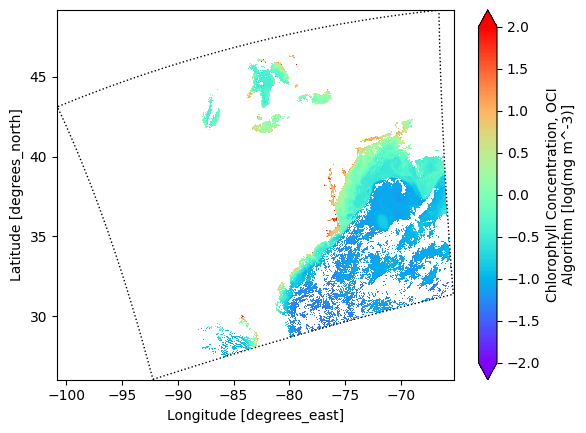

In [34]:
product = "chlor_a"

#cbar = "viridis"
cbar = "rainbow"
cmin = -2
cmax = 2

dataset = dataset.set_coords(("longitude", "latitude"))

chla = np.log10(dataset[product])
chla.attrs.update( {"units": f'log({chla.attrs["units"]})'} )


plot = chla.plot(x="longitude", y="latitude", cmap=cbar, vmin=cmin, vmax=cmax)

rs.add_swath_outline(plt.gca(), dataset, chla)
plt.show()


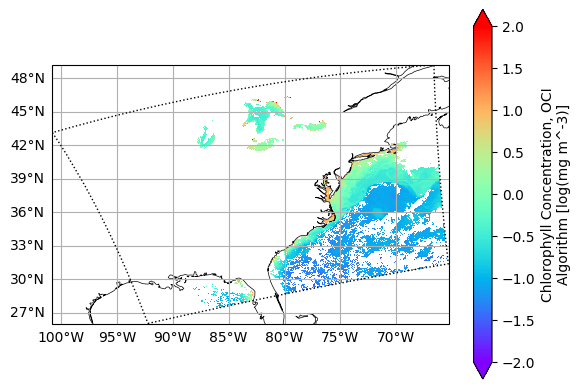

In [35]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.5)
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})

plot = chla.plot(x="longitude", y="latitude", cmap=cbar, vmin=cmin, vmax=cmax, ax=ax)

rs.add_swath_outline(plt.gca(), dataset, chla)
plt.show()


## Quicklook of L3 product(s)

In [10]:
# fig = plt.figure()
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.coastlines()
# ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
# plot = dataset["chlor_a"].plot(x="longitude", y="latitude", cmap="viridis", vmax=5, ax=ax)

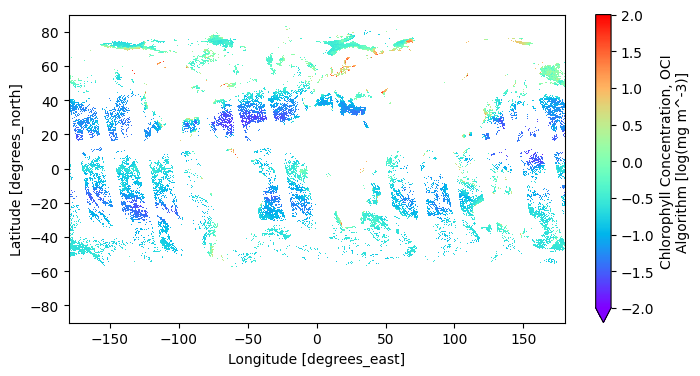

In [17]:
product = "chlor_a"

#cbar = "viridis"
cbar = "rainbow"
cmin = -2
cmax = 2

chla = np.log10(dataset[product])
chla.attrs.update( {"units": f'log({chla.attrs["units"]})'} )

plot = chla.plot(aspect=2, size=4, cmap=cbar, vmin=cmin, vmax=cmax)

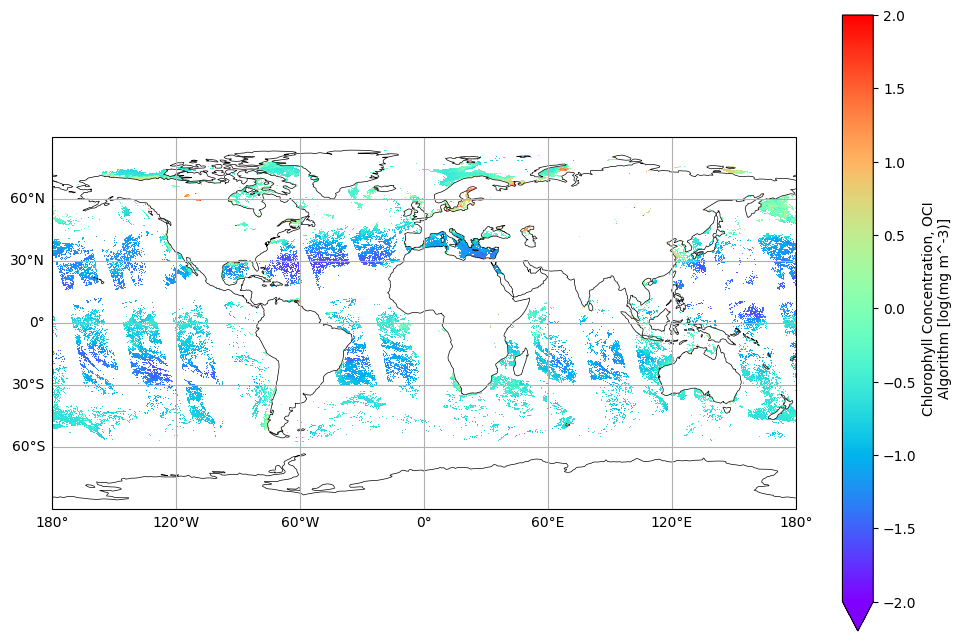

In [24]:
plt.figure(figsize=(12, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.5)
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})

plot = chla.plot(cmap=cbar, vmin=cmin, vmax=cmax, ax=ax)

plt.show()